<img src="https://live.staticflickr.com/65535/51202457097_7bc51ca388_b.jpg" width="400">

# Exploratory Data analysis of Airbnb in New York

Airbnb is a service that lets property owners rent out their spaces to travelers looking for a place to stay. It was founded in 2008 and since then it has grown exponentially. We will use a dataset from Kaggle to explore the offer of accommodations in NYC and the preferences of the customers. We will do Exploratory Data Analysis, with tools learn in the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), such as `Numpy`, `Pandas`, `Matplotlib` and `Seaborn`.

## Downloading the Dataset

Let's begin by downloading the dataset.

In [1]:
import pandas as pd, numpy as np

In [2]:
nyc_listings_raw = pd.read_csv("../input/airbnbopendata/Airbnb_Open_Data.csv", low_memory=False)

## Data Preparation and Cleaning

### TODO

1. Choose the columns on which the analysis will be performed.
2. Make the column names consistent.
3. Verify the columns have the appropriate data type.
4. Deal with null values.
5. Deal with duplicates.
6. Check for inconsistencies.

In [3]:
nyc_listings_raw.shape

(102599, 26)

The data frame has 102599 rows and 26 columns. Let's take a look at the first rows.

In [4]:
pd.set_option('display.max_columns', None)
nyc_listings_raw.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


The meaning of each column can be found on this [webpage](http://insideairbnb.com/data-assumptions), in this [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) and in the [Kaggle's dataset](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata).

When looking at the column names, we see some inconsistency. Let's change them all to snake case and replace blank spaces between words with underscores.

In [5]:
nyc_listings_raw.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
nyc_listings_raw.columns = nyc_listings_raw.columns.str.strip().str.lower().str.replace(" ", "_")

### Analysis of the data types

In [7]:
nyc_listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

The necessary changes are:
1. "host_identity_verified" and "instant_bookable" should be a boolean.
2. "cancellation_policy" and "room_type" should be categorical.
3. "construction_year", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "review_rate_number" and "availability_365" should be integer.
4. "price" and "service_fee" should be float.
5. "last_review" should be datetime.

In [8]:
# 1. Converting "instant_bookable" to boolean
nyc_listings_raw.instant_bookable = nyc_listings_raw.instant_bookable.astype("boolean")

In [9]:
# 1. Converting "host_identity_verified" to boolean
nyc_listings_raw.host_identity_verified = nyc_listings_raw.host_identity_verified.replace({"unconfirmed":False,"verified":True})

nyc_listings_raw.host_identity_verified = nyc_listings_raw.host_identity_verified.astype("boolean")

In [10]:
# 2. Converting "cancellation_policy" to categorical
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["flexible", "moderate", "strict"], ordered=True)

nyc_listings_raw.cancellation_policy = nyc_listings_raw.cancellation_policy.astype(cat_type)

In [11]:
# 2. Converting "room_type" to categorical

cat_type2 = CategoricalDtype(categories=nyc_listings_raw.room_type.unique(), ordered=False)

nyc_listings_raw.room_type = nyc_listings_raw.room_type.astype(cat_type2)

In [12]:
# 3. Converting "construction_year", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", 
# "review_rate_number" and "availability_365"  to integer.

to_int = ["construction_year", "minimum_nights", 
          "number_of_reviews", "calculated_host_listings_count", 
          "review_rate_number", "availability_365"]

for column in to_int:
    nyc_listings_raw[column] = nyc_listings_raw[column].astype("Int64")

In [13]:
# 4. Converting "price" and "service_fee" to float.

# We remove the whitespaces, the "," and "$" signs and then we change the type to float64

nyc_listings_raw.price = nyc_listings_raw.price.str.strip("$").str.strip().str.replace(",","").astype("float64")
nyc_listings_raw.service_fee = nyc_listings_raw.service_fee.str.strip("$").str.strip().str.replace(",","").astype("float64")

In [14]:
# 5. Converting "last_review" to datetime
nyc_listings_raw["last_review"] = pd.to_datetime(nyc_listings_raw.last_review, format="%m/%d/%Y", errors="raise")

Let's select some columns to work with. We'll add some comments for those that are not self-explanatory.

In [15]:
selected_obj = ["neighbourhood_group"]

selected_num = [
    "id", # Airbnb's unique identifier for the listing
    "host_id", # Airbnb's unique identifier for the host
    "construction_year",
    "price", # How much a room costs per night
    "service_fee", 
    "minimum_nights",
    "number_of_reviews",
    "review_rate_number"
]

selected_bool_cat = [
    "host_identity_verified", # Whether the identity of the host was verified or not
    "instant_bookable", # Whether the guest can book the listing without the host being required to accept their request
    "cancellation_policy",
    "room_type",
]

selected_datetime = ["last_review"] # The date of the last review 

selected_columns = selected_obj + selected_num + selected_bool_cat + selected_datetime

Let's make a copy of the dataframe with these selected columns.

In [16]:
nyc_listings = nyc_listings_raw[selected_columns].copy()

#### Analysis of missing values

In [17]:
#Check for nulls

def check_nulls(df, column):
    """
    Evaluates the presence of null values in a column of a dataframe.
    
    :df: dataframe
    :column: column of a dataframe
    """
    print(f"{column.name} has {column.isnull().sum()} nulls which represent {(column.isnull().sum())/df.shape[0]:.2%} of the total rows.")

In [18]:
for column in selected_columns:
    check_nulls(nyc_listings, nyc_listings[column])

neighbourhood_group has 29 nulls which represent 0.03% of the total rows.
id has 0 nulls which represent 0.00% of the total rows.
host_id has 0 nulls which represent 0.00% of the total rows.
construction_year has 214 nulls which represent 0.21% of the total rows.
price has 247 nulls which represent 0.24% of the total rows.
service_fee has 273 nulls which represent 0.27% of the total rows.
minimum_nights has 409 nulls which represent 0.40% of the total rows.
number_of_reviews has 183 nulls which represent 0.18% of the total rows.
review_rate_number has 326 nulls which represent 0.32% of the total rows.
host_identity_verified has 289 nulls which represent 0.28% of the total rows.
instant_bookable has 105 nulls which represent 0.10% of the total rows.
cancellation_policy has 76 nulls which represent 0.07% of the total rows.
room_type has 0 nulls which represent 0.00% of the total rows.
last_review has 15893 nulls which represent 15.49% of the total rows.


Except "last_review", the nulls in the other columns represent less than 0.5% of the rows. Let's see how much they would represent if we dropped all those nulls.

In [19]:
# We select all columns except last_review
few_nulls = selected_columns[:]
few_nulls.remove("last_review")

In [20]:
rows_with_nulls = nyc_listings[few_nulls].isna().any(axis=1).sum()

print(f"In the dataframe there are {rows_with_nulls} rows with at least one null {rows_with_nulls/nyc_listings.shape[0]:.2%} of the total rows.")

In the dataframe there are 1904 rows with at least one null 1.86% of the total rows.


1.86% is a fairly low percentage of rows, so we will drop them.

In [21]:
nyc_listings.dropna(subset=few_nulls, inplace=True)

Now let's inspect the columns and clean them if required.

#### Object Column

In [22]:
selected_obj

['neighbourhood_group']

NYC neighbourhood groups are known as "Boroughs". Let's rename the column.

In [23]:
nyc_listings.rename(columns={"neighbourhood_group":"borough"}, inplace=True)

In [24]:
nyc_listings.borough.unique() # Looking for unique values

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Staten Island',
       'Bronx'], dtype=object)

NYC has 5 boroughs: The Bronx, Brooklyn, Manhattan, Queens, and Staten Island. Here we can see that Brooklyn and Manhattan were mispelled in some cases. Let's correct that.

In [25]:
nyc_listings.loc[nyc_listings.borough == "brookln", "borough"] = "Brooklyn"
nyc_listings.loc[nyc_listings.borough == "manhatan", "borough"] = "Manhattan"

#### Numeric columns

In [26]:
nyc_listings[selected_num].describe()

,id,host_id,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number
count,1.006950e+05,1.006950e+05,100695.000000,100695.000000,100695.000000,100695.000000,100695.000000,100695.000000
mean,2.926108e+07,4.925195e+10,2012.488902,625.382075,125.077154,8.106261,27.290590,3.280222
std,1.621897e+07,2.854199e+10,5.763975,331.667541,66.336917,30.571430,49.157115,1.284008
min,1.001254e+06,1.236005e+08,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000
25%,1.522058e+07,2.455850e+10,2007.000000,340.000000,68.000000,2.000000,1.000000,2.000000
50%,2.927799e+07,4.912062e+10,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000
75%,4.330614e+07,7.399118e+10,2017.000000,913.000000,183.000000,5.000000,30.000000,4.000000
max,5.736024e+07,9.876313e+10,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000


At first sight, we can see some inconsistencies in the minimum_nights column. Negative values are impossible and great values, such as 5645 are highly unlikely. Let's see what are the most popular values for this column.

In [27]:
nyc_listings.minimum_nights.value_counts(normalize=True).mul(100).round(1).astype(str).head(10) + "%"

1     24.9%
2     23.1%
3     15.8%
30    11.4%
4      6.5%
5      5.9%
7      3.9%
6      1.5%
14     1.1%
10     0.9%
Name: minimum_nights, dtype: object

The minimum_nights that represent more than 1% of the data are between 1 and 30. Let's exclude the values outside this range by replacing them with NaNs.

In [28]:
nyc_listings.loc[nyc_listings.minimum_nights < 0, "minimum_nights"] = pd.NA
nyc_listings.loc[nyc_listings.minimum_nights > 30, "minimum_nights"] = pd.NA

#### Boolean/Categorical columns

In [29]:
for column in nyc_listings[selected_bool_cat]:
    print(f"{column} {nyc_listings[column].unique()} \n")

host_identity_verified <BooleanArray>
[False, True]
Length: 2, dtype: boolean 

instant_bookable <BooleanArray>
[False, True]
Length: 2, dtype: boolean 

cancellation_policy ['strict', 'moderate', 'flexible']
Categories (3, object): ['flexible' < 'moderate' < 'strict'] 

room_type ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'] 



#### Datetime column

In [30]:
nyc_listings[selected_datetime].describe(datetime_is_numeric=True)

,last_review
count,85149
mean,2019-06-11 09:14:04.350491392
min,2012-07-11 00:00:00
25%,2018-10-27 00:00:00
50%,2019-06-13 00:00:00
75%,2019-07-05 00:00:00
max,2026-03-28 00:00:00


The first date in this column is 2012-07-11 and the last one is 2026-03-28. The latter is impossible since, at the moment of this analysis (November 2022), the temporal coverage end date was 2022-02-28. Let's replace the dates after 2022-08-01 with NaNs.

In [31]:
nyc_listings.loc[nyc_listings.last_review > "2022-02-28", "last_review"] = pd.NA

In [32]:
nyc_listings[selected_datetime].describe(datetime_is_numeric=True)

,last_review
count,84501
mean,2019-06-03 17:25:27.702630656
min,2012-07-11 00:00:00
25%,2018-10-22 00:00:00
50%,2019-06-12 00:00:00
75%,2019-07-05 00:00:00
max,2022-02-28 00:00:00


The first date is still 2012-07-11 and the last one is 2022-02-28. Let's create separate columns for year and month.

In [33]:
nyc_listings["last_review_year"] = pd.DatetimeIndex(nyc_listings.last_review).year
nyc_listings["last_review_month"] = pd.DatetimeIndex(nyc_listings.last_review).month

nyc_listings["last_review_year"] = nyc_listings["last_review_year"].astype("Int64")
nyc_listings["last_review_month"] = nyc_listings["last_review_month"].astype("Int64")

#### Analysis of duplicates

In [34]:
nyc_listings.duplicated().sum()

525

There are 525 duplicates. Let's drop these records.

In [35]:
nyc_listings.drop_duplicates(inplace=True)

Let's examine the duplicates in specific columns.

In [36]:
def check_column_duplicates(df):
  """
  Checks the number of duplicates in each column of a dataframe.

  :param df: pandas dataframe.
  :return: number of duplicates in each column of the dataframe.
  """

  for column in df:
    print(f"Column {column}: Number of duplicates:{df.duplicated(subset=[column]).sum()}")

check_column_duplicates(nyc_listings)

Column borough: Number of duplicates:100165
Column id: Number of duplicates:0
Column host_id: Number of duplicates:1
Column construction_year: Number of duplicates:100150
Column price: Number of duplicates:99019
Column service_fee: Number of duplicates:99939
Column minimum_nights: Number of duplicates:100139
Column number_of_reviews: Number of duplicates:99696
Column review_rate_number: Number of duplicates:100165
Column host_identity_verified: Number of duplicates:100168
Column instant_bookable: Number of duplicates:100168
Column cancellation_policy: Number of duplicates:100167
Column room_type: Number of duplicates:100166
Column last_review: Number of duplicates:97736
Column last_review_year: Number of duplicates:100158
Column last_review_month: Number of duplicates:100157


"id", which is the primary key, does not have duplicates. There is only 1 duplicate for "host_id", meaning a host with 2 properties. Duplicates are expected in the other columns.

#### Review of the cleaned dataframe

In [37]:
nyc_listings.shape

(100170, 16)

In [38]:
nyc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100170 entries, 0 to 102044
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   borough                 100170 non-null  object        
 1   id                      100170 non-null  int64         
 2   host_id                 100170 non-null  int64         
 3   construction_year       100170 non-null  Int64         
 4   price                   100170 non-null  float64       
 5   service_fee             100170 non-null  float64       
 6   minimum_nights          98513 non-null   Int64         
 7   number_of_reviews       100170 non-null  Int64         
 8   review_rate_number      100170 non-null  Int64         
 9   host_identity_verified  100170 non-null  boolean       
 10  instant_bookable        100170 non-null  boolean       
 11  cancellation_policy     100170 non-null  category      
 12  room_type               100170

In [39]:
nyc_listings.isnull().sum()

borough                       0
id                            0
host_id                       0
construction_year             0
price                         0
service_fee                   0
minimum_nights             1657
number_of_reviews             0
review_rate_number            0
host_identity_verified        0
instant_bookable              0
cancellation_policy           0
room_type                     0
last_review               16136
last_review_year          16136
last_review_month         16136
dtype: int64

In [40]:
nyc_listings.describe()

,id,host_id,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,last_review_year,last_review_month
count,1.001700e+05,1.001700e+05,100170.000000,100170.000000,100170.000000,98513.000000,100170.000000,100170.000000,100170,100170,84034.000000,84034.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50126,50310,NaN,NaN
mean,2.929962e+07,4.926448e+10,2012.489398,625.423171,125.085455,6.528945,27.326755,3.279744,NaN,NaN,2018.969013,5.920556
std,1.623244e+07,2.854061e+10,5.764243,331.667901,66.337015,9.344124,49.222169,1.284508,NaN,NaN,1.646106,3.024758
min,1.001254e+06,1.236005e+08,2003.000000,50.000000,10.000000,1.000000,0.000000,1.000000,NaN,NaN,2012.000000,1.000000
25%,1.522486e+07,2.456820e+10,2007.000000,340.000000,68.000000,1.000000,1.000000,2.000000,NaN,NaN,2018.000000,4.000000
50%,2.933294e+07,4.913460e+10,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,NaN,NaN,2019.000000,6.000000
75%,4.337862e+07,7.400112e+10,2017.000000,913.000000,183.000000,5.000000,30.000000,4.000000,NaN,NaN,2019.000000,7.000000


## Exploratory Analysis and Visualization

We will explore some aspects regarding the offer of accommodations.



Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's study the offer of accommodations according to the different room types:
* Private room
* Entire home/apt
* Shared room
* Hotel room

In [42]:
room_types = nyc_listings.room_type.value_counts(normalize=True).mul(100).round(1)
room_types

Entire home/apt    52.4
Private room       45.3
Shared room         2.2
Hotel room          0.1
Name: room_type, dtype: float64

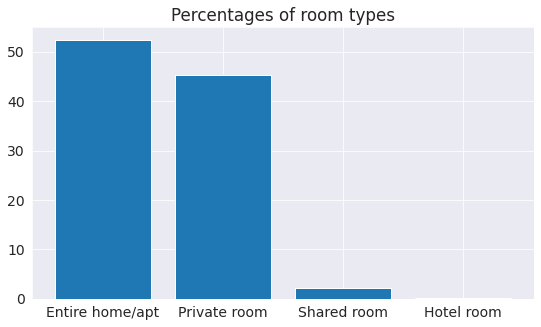

In [43]:
plt.title("Percentages of room types")
plt.bar(room_types.index, room_types);

The majority of the accommodations belong to the category "Entire home/apt", closely followed by "Private room". There is a very low offer of "Shared room" and "Hotel room".

Let's see what happens with the prices.

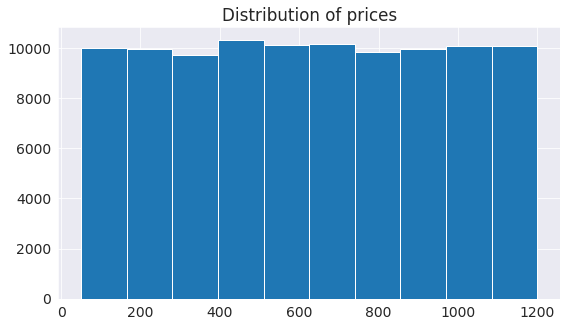

In [44]:
plt.title("Distribution of prices")
plt.hist(nyc_listings.price);

There seems to be some uniformity in the distribution of the prices, which are in the range 50-1200 dollars.

Now, let's see what are the most common and uncommon cancellation policies.

In [45]:
cancellations = nyc_listings.cancellation_policy.value_counts()
cancellations

moderate    33560
strict      33359
flexible    33251
Name: cancellation_policy, dtype: int64

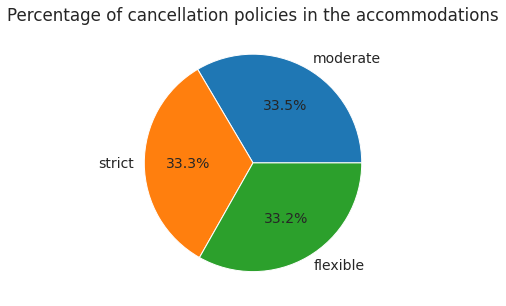

In [46]:
plt.title("Percentage of cancellation policies in the accommodations")
plt.pie(cancellations, autopct='%1.1f%%', labels = cancellations.index);

The cancellation policies are almost evenly distributed between the 3 categories.

Let's examine if there is a correlation between the price and the service fee.

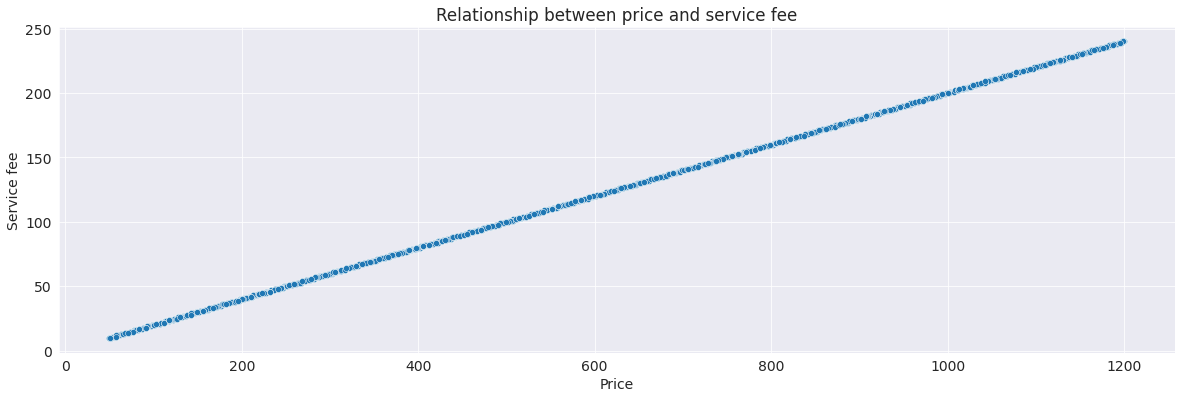

In [47]:
plt.figure(figsize=(20, 6))
plt.title("Relationship between price and service fee")
plt.xlabel("Price")
plt.ylabel("Service fee")
sns.scatterplot(x=nyc_listings.price, y=nyc_listings.service_fee);

In [48]:
nyc_listings["price"].corr(nyc_listings["service_fee"]) # calculating the correlation between price and service fee

0.9999908817370267

There is a large correlation between price and service fee. It seems the service fee represents a fixed percentage of the price.

In [49]:
round(((nyc_listings.service_fee / nyc_listings.price) * 100).mean(),2)

20.0

The service fee seems to represent 20% of the price.

Finally, let's see the number of accommodations, according to their year of construction.

In [50]:
accom_by_const_year = nyc_listings.groupby("construction_year").minimum_nights.count().to_frame().rename(columns={"minimum_nights":"number_of_accommodations"})
accom_by_const_year

,number_of_accommodations
construction_year,
2003,4938
2004,4824
2005,4934
2006,5020
2007,4921
2008,5016
2009,4974
2010,4957
2011,4879


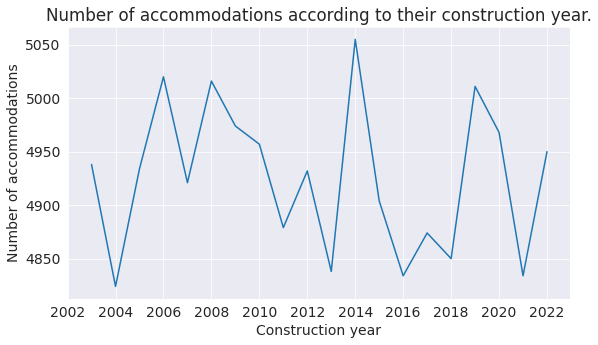

In [51]:
plt.plot(accom_by_const_year)
plt.xticks(np.arange(2002, 2023, step=2))
plt.xlabel("Construction year")
plt.ylabel("Number of accommodations")
plt.title("Number of accommodations according to their construction year.");

The highest number of accommodations available were built in 2014, whereas the lowest number belongs to those built in 2004.

## Asking and Answering Questions

I'm interested in the favorite features of the users, so I will use the review_rate_number to explore them. Since accommodations and reviews may change over time, we will use recent reviews, from 2018 on. Since a low number of reviews might skew the results, we will select records where the number of reviews is larger than or equal to the median.

In [52]:
recently_reviewed = nyc_listings[nyc_listings.last_review_year >= 2018]
recently_reviewed = recently_reviewed[recently_reviewed.number_of_reviews >= recently_reviewed.number_of_reviews.median()]

#### Q1: How are the review rate numbers distributed?

In [53]:
rate_numbers_dist = recently_reviewed.review_rate_number.value_counts(normalize=True).mul(100).round(1)
rate_numbers_dist

5    22.9
3    22.6
2    22.4
4    22.4
1     9.7
Name: review_rate_number, dtype: Float64

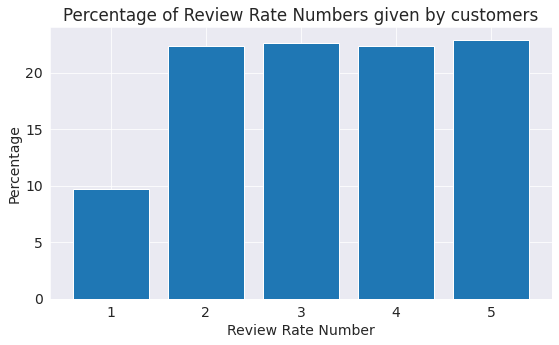

In [54]:
plt.ylabel("Percentage")
plt.xlabel("Review Rate Number")
plt.title("Percentage of Review Rate Numbers given by customers")
plt.bar(rate_numbers_dist.index, rate_numbers_dist);

The least selected rate was 1, with approximately 10%, and the other review rate numbers had similar percentages, about 22%.

#### Q2: In what borough are located the highest rated accommodations?

In [55]:
# group by borough, calculate the mean of review_rate_number and sort the values
rate_by_borough = recently_reviewed.groupby("borough")["review_rate_number"].mean().sort_values(ascending=False)
rate_by_borough

borough
Staten Island    3.296296
Queens           3.289693
Manhattan        3.263436
Brooklyn           3.2546
Bronx            3.240369
Name: review_rate_number, dtype: Float64

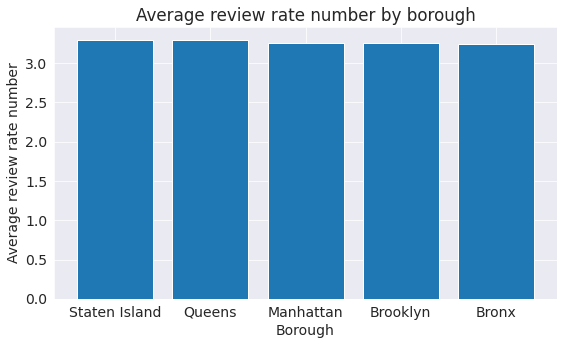

In [56]:
plt.title("Average review rate number by borough")
plt.xlabel("Borough")
plt.ylabel("Average review rate number")
plt.bar(rate_by_borough.index, rate_by_borough);

By a very scarce margin, Staten Island is the highest rated borough and Bronx the lowest rated.

#### Q3: Is the price related to the review rate number?

The prices range from 50 to 1200 dollars. Let's create a column "price_range" with 3 categories:
* Cheap (1-400)
* Medium (401-800)
* Expensive (801-1200)

In [57]:
# create a list of our conditions
conditions = [
    (recently_reviewed['price'] <= 400),
    (recently_reviewed['price'] <= 800),
    (recently_reviewed['price'] <= 1200),    
    ]

# create a list of the values we want to assign for each condition
values = ['Cheap', 'Medium', 'Expensive']

# create a new column and use np.select to assign values to it using our lists as arguments
recently_reviewed['price_range'] = np.select(conditions, values)

# display updated DataFrame
recently_reviewed[["price", "price_range"]].head()

,price,price_range
3,368.0,Cheap
5,577.0,Medium
8,1018.0,Expensive
10,319.0,Cheap
11,606.0,Medium


In [58]:
# group by price_range, calculate the mean of review_rate_number and sort the values
rate_by_price_range = recently_reviewed.groupby("price_range")["review_rate_number"].mean().sort_values(ascending=False)
rate_by_price_range

price_range
Cheap        3.284713
Medium       3.256093
Expensive    3.252858
Name: review_rate_number, dtype: Float64

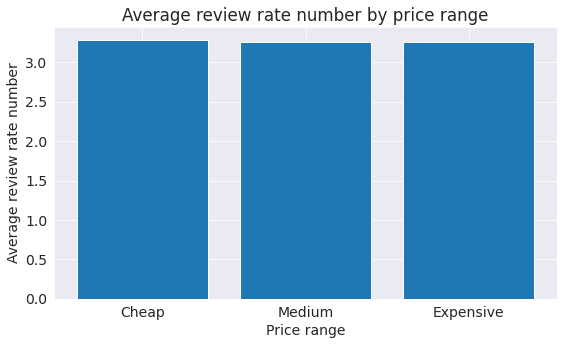

In [59]:
plt.title("Average review rate number by price range")
plt.xlabel("Price range")
plt.ylabel("Average review rate number")
plt.bar(rate_by_price_range.index, rate_by_price_range);

Again, with very little difference, there seems to be a preference for cheaper accommodations.

#### Q4: Does the booking condition affect the rate of the users?

In [60]:
# group by instant_bookable, calculate the mean of review_rate_number and sort the values
rate_by_inst_book = recently_reviewed.groupby("instant_bookable")["review_rate_number"].mean().sort_values(ascending=False)
rate_by_inst_book.rename({False:"No", True: "Yes"}, inplace = True)
rate_by_inst_book

instant_bookable
No     3.266911
Yes    3.260063
Name: review_rate_number, dtype: Float64

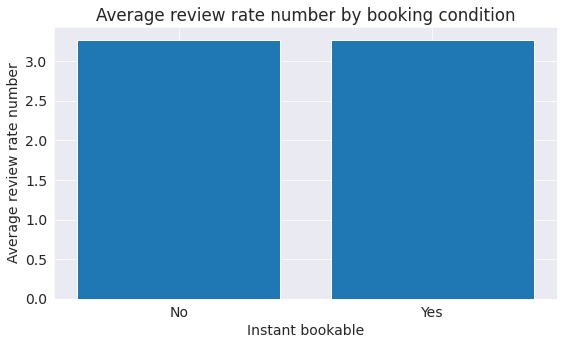

In [61]:
plt.title("Average review rate number by booking condition")
plt.xlabel("Instant bookable")
plt.ylabel("Average review rate number")
plt.bar(rate_by_inst_book.index, rate_by_inst_book);

There is virtually no difference between accommodations that can be booked immediately and those that require confirmation of the host.

#### Q5: Is there a preference regarding the room type?

In [62]:
# group by room_type, calculate the mean of review_rate_number and sort the values
rate_by_room_type = recently_reviewed.groupby("room_type")["review_rate_number"].mean().sort_values(ascending=False)
rate_by_room_type

room_type
Hotel room         3.566667
Shared room        3.278034
Private room       3.272172
Entire home/apt    3.254501
Name: review_rate_number, dtype: Float64

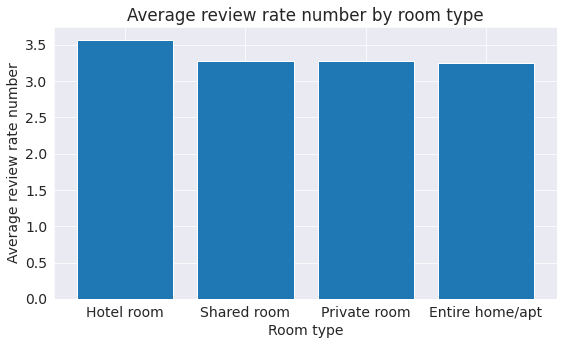

In [63]:
plt.title("Average review rate number by room type")
plt.xlabel("Room type")
plt.ylabel("Average review rate number")
plt.bar(rate_by_room_type.index, rate_by_room_type);

We saw before that hotel rooms are the accommodations with the lowest offer in Airbnb. In contrast, they have the highest review rate numbers.

## Inferences and Conclusion

We can establish some conclusions regarding the **offer of accommodations** of Airbnb in New York City:
* The majority of the accommodations belong to the category "Entire home/apt", closely followed by "Private room". There is a very low offer of "Shared room" and "Hotel room".
* The prices are almost uniformly distributed in the range 50-1200 dollars.
* The cancellation policies are almost evenly distributed between the 3 categories: flexible, moderate, strict.
* There is a large correlation between the price and the service fee, the latter representing 20% of the former.
* The accommodations were built between 2003 and 2022, being 2014 the construction year with the highest number of accommodations available and 2004 the construction year with the lowest number.

<br>

Regarding the **preferences of the users**, we can see that:
* The rate numbers are almost evenly distributed between 2, 3, 4 and 5. There is a lower tendency to rate with 1.
* With little difference, Staten Island is the highest rated borough and Bronx the lowest rated..
* Overall, there is a slight preference for cheaper accommodations.
* There is virtually no difference between accommodations that can be booked immediately and those that require confirmation of the host.
* Even there is a lower offer, hotel rooms are the best rated.

<br>

With this information, some **actions** Airbnb could take to increase its revenue are:
* Increase the offer of cheaper accommodations.
* Increase the offer of hotel rooms.

## References and Future Work

There is a number of unexplored features in this dataset that could be the object of future analysis. Some things we could do are:
* A more detailed analysis considering the neighbourhood.
* Consider a larger time period for the reviews.
* Study the minimum nights effect on the customers preferences.

Some useful resources are:
* NYC Airbnb dataset: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib official site: https://matplotlib.org/